In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
sys.path.append('../tools/')
import tools
%matplotlib inline

## DNN from scratch

approximate sin function from random values.

In [2]:
x = np.linspace(-2, 2, 1000)

In [3]:
y = np.sin(x)**2

In [4]:
df = pd.DataFrame({'x':x,'y':y})

In [13]:
class DeepNeuralNetwork():
    """
    Deep Neural Net built from scratch
    capable of regression tasks
    TODO: Vanishing/Exploding gradient is an issue right now, very sensitive to initial weight placement.
    """
    def __init__(self,X,y):
        self.X = X
        self.y = y
        self.output = 0
        self.layerdims = []
        self.layers = []
        self.weights = []
        self.derivlayers = []
        self.gradients = []
        self.initialized = False
        
    def add(self,nodes):
        if len(self.layerdims) == 0:
        
            self.layerdims.append((self.X.shape[1],nodes))
        else:
            last = self.layerdims[-1]
            self.layerdims.append((last[1],nodes))
    
    def initialize(self,low = -10,high=10,numoutputs=1):
        '''
        make sure to do this after adding all the layers
        '''
        #takes two elements, the first entry is lower bound & second is upper. Default is -10 to 10. 
        #Default number of outputs is 1 output
        self.weights = []
        for i in range(len(self.layerdims)):
            layerdim = self.layerdims[i]
            weight = np.random.uniform(low=low,high=high,size=(layerdim[0],layerdim[1]))
            self.weights.append(weight)
            if (i == (len(self.layerdims)-1)) and self.initialized == False:
                self.weights.append( np.random.uniform(low=low,high=high,size=(layerdim[1],numoutputs)))
                self.layerdims.append((layerdim[1],numoutputs))
        self.initialized = True
        
    def foward(self,X):
        '''
        foward pass
        '''
        self.layers = []
        self.derivlayers = []
        weights = self.weights
        self.layers.append(X)
        i = 0
        val = 0
        while i < len(weights):
            if i == 0:
                val = tools.sigmoid(X.dot(weights[i]))
                derival = tools.sigmoid(X.dot(weights[i]),True)
                self.layers.append(val)
                self.derivlayers.append(derival)
            elif i == (len(weights)-1):
                val = val.dot(weights[i])
                derival = 1
                self.derivlayers.append(derival)
            else:
                derival = tools.sigmoid(val.dot(weights[i]),True)
                val = tools.sigmoid(val.dot(weights[i]))
                self.layers.append(val)
                self.derivlayers.append(derival)
            i += 1
        return val
    
    def calculate_gradients(self):
        self.gradients = []
        y = self.y
        output = self.output
        loss = output - y
        layers = self.layers
        derivlayers = self.derivlayers
        i = len(self.weights)-1

        while i >= 0:
            if(i ==  (len(self.weights)-1)):
                chain = loss
                self.gradients.append(self.layers[i].T.dot(loss))
            else:
                chain = (chain.dot(self.weights[i+1].T))*derivlayers[i]
                self.gradients.append(layers[i].T.dot(chain))
            i-=1
 
        self.gradients = self.gradients[::-1]
            
    def train(self,epochs=1000,learning_rate=0.001):
        '''
        Trains the neural network
        epochs- number of times the network uses the full data set to train
        learning_rate- how much influence the gradient has on the weights, for grad descent
        '''
        if self.initialized == False:
            self.initialize()
        self.output = self.foward(self.X)
        for i in range(epochs):
            MSE = np.sum((self.y - self.output)**2)
            print("MSE at epoch " + str(i) + ": " + str(MSE))
            self.calculate_gradients()
            for i in range(len(self.weights)):
                #print("START")
                #print(self.weights[i])
                self.weights[i] = self.weights[i] - learning_rate*self.gradients[i]
                #print("AFTER")
                #print(self.weights[i])
            self.output = self.foward(self.X)
    
    def predict(self,Xtest):
        weights = self.weights
        i = 0
        val = 0
        while i < len(weights):
            if i == 0:
                val = tools.sigmoid(Xtest.dot(weights[i]))
            elif i == (len(weights)-1):
                val = val.dot(weights[i])
            else:
                val = tools.sigmoid(val.dot(weights[i]))
            i += 1
        return val
    
        

In [ ]:
m = DeepNeuralNetwork(x.reshape(x.shape[0],1),y)
m.y = y.reshape(y.shape[0],1)
m.add(20)
m.add(5)


#m.calculate_gradients()
m.train(10000,0.001)

MSE at epoch 0: 164810.67942341702
MSE at epoch 1: 298019.5164687115
MSE at epoch 2: 442498.6143500258
MSE at epoch 3: 583967.2019457119
MSE at epoch 4: 429423.6431416506
MSE at epoch 5: 44263.28757493061
MSE at epoch 6: 3736.9079988760736
MSE at epoch 7: 713.8902852355615
MSE at epoch 8: 402.6952404399549
MSE at epoch 9: 301.94737324884585
MSE at epoch 10: 242.1771198770792
MSE at epoch 11: 203.2503201829303
MSE at epoch 12: 177.66196990913562
MSE at epoch 13: 160.82885645857064
MSE at epoch 14: 149.7556132750721
MSE at epoch 15: 142.47185941794157
MSE at epoch 16: 137.68091879272845
MSE at epoch 17: 134.52959306985287
MSE at epoch 18: 132.45658327652745
MSE at epoch 19: 131.0926789928194
MSE at epoch 20: 130.19505151315371
MSE at epoch 21: 129.60400915686932
MSE at epoch 22: 129.21454226757382
MSE at epoch 23: 128.95760332838552
MSE at epoch 24: 128.78779349296235
MSE at epoch 25: 128.67526412300748
MSE at epoch 26: 128.60039104625417
MSE at epoch 27: 128.55027250971818
MSE at epoch 

MSE at epoch 232: 127.79500293581535
MSE at epoch 233: 127.79095554881823
MSE at epoch 234: 127.78689817429486
MSE at epoch 235: 127.78283077240468
MSE at epoch 236: 127.77875330308989
MSE at epoch 237: 127.77466572607408
MSE at epoch 238: 127.77056800086062
MSE at epoch 239: 127.76646008673123
MSE at epoch 240: 127.76234194274438
MSE at epoch 241: 127.7582135277338
MSE at epoch 242: 127.75407480030688
MSE at epoch 243: 127.74992571884314
MSE at epoch 244: 127.74576624149267
MSE at epoch 245: 127.74159632617443
MSE at epoch 246: 127.73741593057483
MSE at epoch 247: 127.73322501214588
MSE at epoch 248: 127.72902352810378
MSE at epoch 249: 127.72481143542713
MSE at epoch 250: 127.72058869085527
MSE at epoch 251: 127.71635525088672
MSE at epoch 252: 127.7121110717774
MSE at epoch 253: 127.70785610953891
MSE at epoch 254: 127.70359031993685
MSE at epoch 255: 127.69931365848916
MSE at epoch 256: 127.6950260804642
MSE at epoch 257: 127.69072754087921
MSE at epoch 258: 127.68641799449827
MSE 

MSE at epoch 456: 126.53357140738848
MSE at epoch 457: 126.52565422899013
MSE at epoch 458: 126.51770785378868
MSE at epoch 459: 126.509732111689
MSE at epoch 460: 126.50172683127138
MSE at epoch 461: 126.4936918397788
MSE at epoch 462: 126.48562696310422
MSE at epoch 463: 126.47753202577756
MSE at epoch 464: 126.46940685095272
MSE at epoch 465: 126.46125126039432
MSE at epoch 466: 126.45306507446426
MSE at epoch 467: 126.44484811210835
MSE at epoch 468: 126.43660019084253
MSE at epoch 469: 126.42832112673909
MSE at epoch 470: 126.42001073441271
MSE at epoch 471: 126.4116688270063
MSE at epoch 472: 126.40329521617673
MSE at epoch 473: 126.39488971208047
MSE at epoch 474: 126.3864521233588
MSE at epoch 475: 126.3779822571232
MSE at epoch 476: 126.36947991894036
MSE at epoch 477: 126.36094491281705
MSE at epoch 478: 126.35237704118495
MSE at epoch 479: 126.34377610488505
MSE at epoch 480: 126.33514190315216
MSE at epoch 481: 126.3264742335991
MSE at epoch 482: 126.31777289220062
MSE at e

In [17]:
newd = pd.DataFrame({'x':x,'y':m.output.reshape(m.output.shape[0],)})

Predicted after 10000 epochs

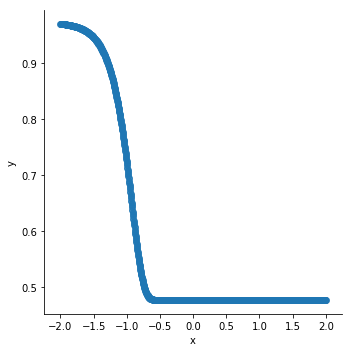

In [18]:
sns.lmplot(x='x', y='y',data=newd,
           fit_reg=False, # No regression line
          )  

Original sin wave

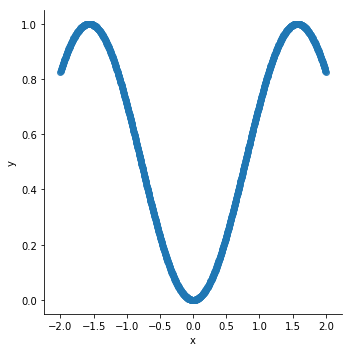

In [9]:
sns.lmplot(x='x', y='y',data=df,
           fit_reg=False, # No regression line
          )   